In [1]:
import os
import sys
import numpy as np
import pandas as pd
from statistics import mean 
import collections

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import com_func

run = "_r6"

Dataset = "pubmed"
result_path = "../../result/"+Dataset+"/3_co_train_sample=140k/"
filter_size = 100
fig_save_path = "../../plot/3_co_train_detail_plots/threshold="+str(filter_size)+"/V1=pv_dbow_V2=n2v"+run+"/"

# Compare co-training (muti-view) with supervised method (feature concatenation) Phase 1: extract result

In [2]:
"""# --------------- Co-training --------------------- #"""
''' plot all selected method with fixed threshold '''
step_threshold = 100
initial_labeled_size = 10
textual_embedding = ["pv_dbow"]
citation_embedding = ["n2v"]
all_method = []
all_method_details =[]
textual_embedding_result = []
#textual_embedding_svm_result = []
# ---------- load different algorithm result ------------------- #
for v1_emb,v2_emb in zip(textual_embedding,citation_embedding):
    # --------------------- textual only file name --------------------------- #
    result_filename = "(init_labeled_size="+str(initial_labeled_size)+") V1="+v1_emb+"_V2="+v2_emb+"_threshold="+str(step_threshold)+run+".csv"
    final_path = os.path.normpath(os.path.join(result_path,result_filename))
    result = pd.read_csv(final_path)
    all_method_details = result["All_fold_details"]
    # ----------------------- read result data in --------------------- #
    for col in result.columns: 
        if "f1" in col:
            textual_embedding_result.append(result[col].values)
            all_method.append(col[0:-3].upper())

#print(all_method_details)
name_group = result["Name"].values
#print(all_method)
#print(textual_embedding_result)
#print(name_group)

In [3]:
print(all_method)
print(textual_embedding_result)

['CO_LR', 'CO_SVM', 'CO_LR_SVM', 'IMPROVED_CO_LR', 'LR-UB', 'LR-LB', 'SVM-UB', 'SVM-LB']
[array([0.96412485, 0.988733  , 0.9719596 , 0.97043848, 0.96151026,
       0.98165232, 0.99216573, 0.94245224, 0.99722169, 0.9763565 ,
       0.94662704, 0.99629515, 0.98836536, 0.98074279, 0.9884262 ]), array([0.96406147, 0.98487143, 0.97697658, 0.96228574, 0.95177882,
       0.97471844, 0.98828368, 0.94902012, 0.99164893, 0.9695026 ,
       0.91985765, 0.8839142 , 0.98081564, 0.94653175, 0.98834862]), array([0.96418986, 0.98487143, 0.96946804, 0.96612098, 0.94681199,
       0.98184664, 0.98820407, 0.93277306, 0.99164893, 0.96947803,
       0.92016193, 0.99629515, 0.98069886, 0.97274418, 0.98378171]), array([0.96387677, 0.9925    , 0.97929235, 0.96617544, 0.95688585,
       0.97776472, 0.98433145, 0.935945  , 0.99722169, 0.96608173,
       0.94408279, 0.98867007, 0.99218014, 0.98313735, 0.98836799]), array([0.98810672, 1.        , 0.99486173, 0.97456442, 0.99044907,
       0.99267677, 0.99216573, 

# Phase 2: Plot 1: Plot mean result

In [4]:
# exclude LR-UB, SVM-UB
all_method_exclude_UB = []
textual_embedding_result_no_UB = []
for pos, (method, result) in enumerate(zip(all_method, textual_embedding_result)):
    if method not in ["LR-UB", "SVM-UB"]:
        all_method_exclude_UB.append(method)
        textual_embedding_result_no_UB.append(result)
print(all_method_exclude_UB)
print(textual_embedding_result_no_UB)

['CO_LR', 'CO_SVM', 'CO_LR_SVM', 'IMPROVED_CO_LR', 'LR-LB', 'SVM-LB']
[array([0.96412485, 0.988733  , 0.9719596 , 0.97043848, 0.96151026,
       0.98165232, 0.99216573, 0.94245224, 0.99722169, 0.9763565 ,
       0.94662704, 0.99629515, 0.98836536, 0.98074279, 0.9884262 ]), array([0.96406147, 0.98487143, 0.97697658, 0.96228574, 0.95177882,
       0.97471844, 0.98828368, 0.94902012, 0.99164893, 0.9695026 ,
       0.91985765, 0.8839142 , 0.98081564, 0.94653175, 0.98834862]), array([0.96418986, 0.98487143, 0.96946804, 0.96612098, 0.94681199,
       0.98184664, 0.98820407, 0.93277306, 0.99164893, 0.96947803,
       0.92016193, 0.99629515, 0.98069886, 0.97274418, 0.98378171]), array([0.96387677, 0.9925    , 0.97929235, 0.96617544, 0.95688585,
       0.97776472, 0.98433145, 0.935945  , 0.99722169, 0.96608173,
       0.94408279, 0.98867007, 0.99218014, 0.98313735, 0.98836799]), array([0.94034222, 0.97675877, 0.97929235, 0.96245762, 0.96165586,
       0.9702378 , 0.98824859, 0.955356  , 0.99444

In [5]:
# sort result wrt improved co-train
sorted_co_lr_idx = []
for method, result in zip(all_method_exclude_UB, textual_embedding_result_no_UB):
    if method =="IMPROVED_CO_LR":
        sorted_co_lr_idx = np.argsort(result)
        
sorted_all_result = []
sorted_exclude_UB_result = []

for result in textual_embedding_result:
    sorted_all_result.append(result[sorted_co_lr_idx])

for result in textual_embedding_result_no_UB:
    sorted_exclude_UB_result.append(result[sorted_co_lr_idx])

sorted_name_group = name_group[sorted_co_lr_idx]

#print(sorted_name_group)
#print(sorted_all_result)
#print(all_method_exclude_upper_bound)

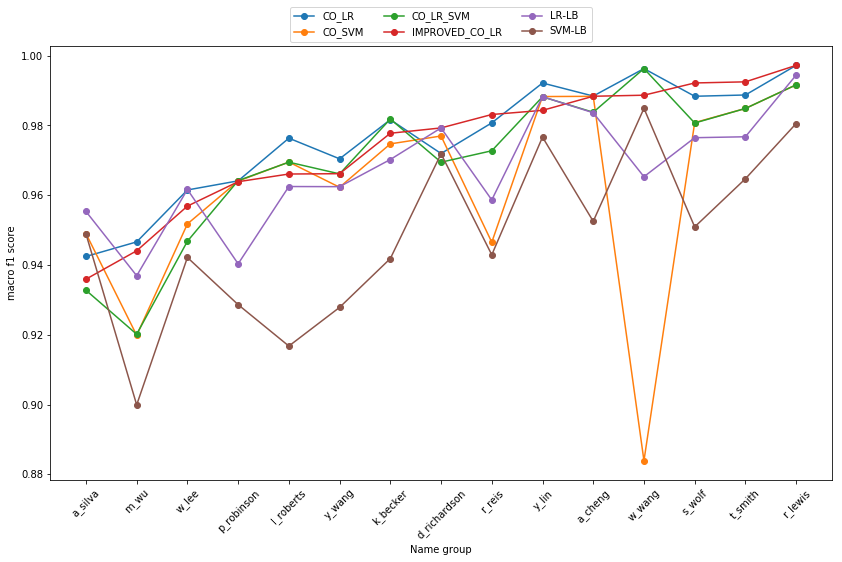

In [6]:
# -------------------- plot all together ------------------- #
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,8))
ax = plt.axes()
for algo, result in zip(all_method_exclude_UB, sorted_exclude_UB_result):
    plt.xticks(range(len(result)), sorted_name_group)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
    plt.plot(result, marker='o', label=algo)
ax.autoscale_view()
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=3)
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
#plt.savefig(fname=fig_save_path+'all_method_mean_result.eps', dpi=150, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# Phase 2: Plot 2. Plot upper/lower bound result for each method and co-train to verify improvement

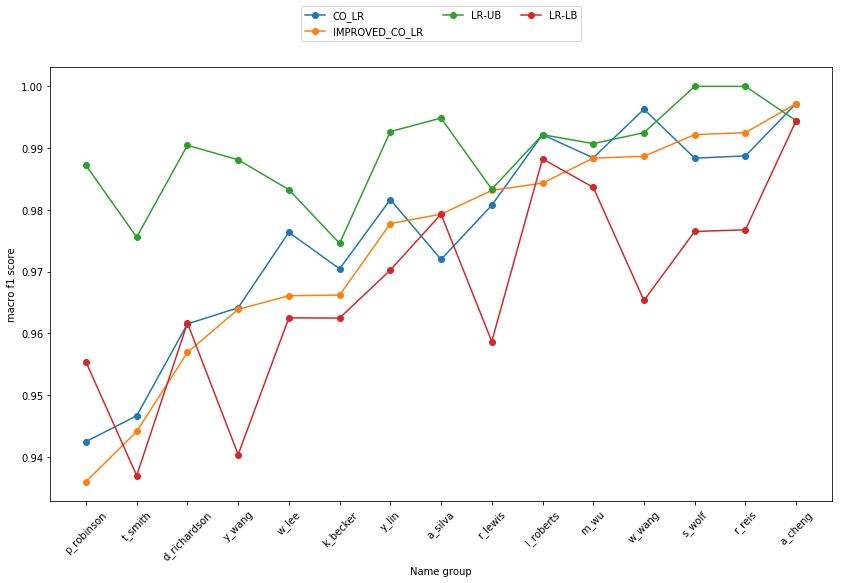

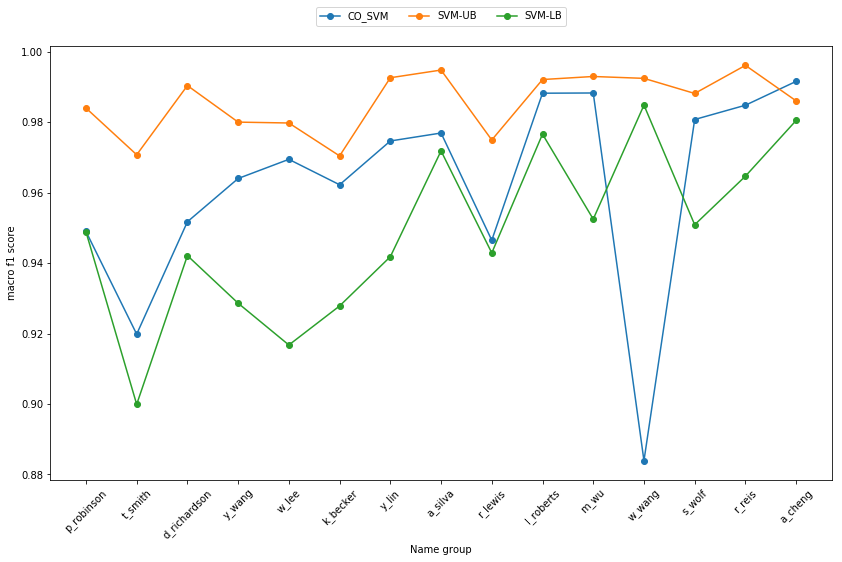

In [7]:
# ------------------------ plot LR and related works ----------------------------- #
fig = plt.figure(figsize=(14,8))
ax = plt.axes()
for algo, result in zip(all_method, sorted_all_result):
    if algo in ["LR-UB", "LR-LB", "CO_LR", "IMPROVED_CO_LR"]:
        plt.xticks(range(len(result)), name_group)
        plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
        plt.plot(result, marker='o', label=algo)
ax.autoscale_view()
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=3)
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
#plt.savefig(fname=fig_save_path+'LR_core_mean_result.png', dpi=150, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()
# ------------------------ plot SVM and related works ----------------------------- #
fig = plt.figure(figsize=(14,8))
ax = plt.axes()
for algo, result in zip(all_method, sorted_all_result):
    if algo in ["SVM-UB", "SVM-LB", "CO_SVM"]:
        plt.xticks(range(len(result)), name_group)
        plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
        plt.plot(result, marker='o', label=algo)
ax.autoscale_view()
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=3)
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
#plt.savefig(fname=fig_save_path+'SVM_core_mean_result.png', dpi=150, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# Phase 3: Plot 1. Plot per fold variance for all method

In [4]:
import ast
cotrain_all_per_fold_result= {}

for author in all_method_details:
    per_fold_f1 = collections.defaultdict(list)
    author = ast.literal_eval(author)
    for per_fold_details in author:
        #print(per_fold_details)
        for key in per_fold_details:
            if key in ['co_LR f1','co_SVM f1','co_LR_SVM f1','Improved_co_LR f1','LR-UB f1','SVM-UB f1','LR-LB f1','SVM-LB f1']:
                per_fold_f1[key].append(per_fold_details[key])
    cotrain_all_per_fold_result[author[0]['author']]=(per_fold_f1)
#print(cotrain_all_per_fold_result)

In [5]:
name_list = list(cotrain_all_per_fold_result.keys())
method_list = []
f1_mean = collections.defaultdict(list)
f1_min = collections.defaultdict(list)
f1_max = collections.defaultdict(list)
for author, author_result in cotrain_all_per_fold_result.items():
    print(author)
    for method, method_result in author_result.items():
        if method.replace(' f1','').upper() not in method_list:
            method_list.append(method.replace(' f1','').upper())
        f1_mean[method.replace(' f1','').upper()].append(np.mean(method_result))
        f1_min[method.replace(' f1','').upper()].append(np.min(method_result))
        f1_max[method.replace(' f1','').upper()].append(np.max(method_result))
        print(method_result, " mean: ", np.mean(method_result), " min: ",np.min(method_result)," max: ", np.max(method_result))
print(name_list)
print(method_list)

p_robinson
[0.9802707930367505, 1.0, 0.9802707930367505, 0.9799919967987194, 1.0]  mean:  0.988106716574444  min:  0.9799919967987194  max:  1.0
[0.9802707930367505, 1.0, 0.9606481481481481, 0.9799919967987194, 0.9794549266247379]  mean:  0.9800731729216711  min:  0.9606481481481481  max:  1.0
[1.0, 0.980361956103196, 0.9212962962962963, 0.9599358974358975, 0.9590301003344481]  mean:  0.9641248500339674  min:  0.9212962962962963  max:  1.0
[0.9604037267080745, 0.9607692307692308, 0.980361956103196, 0.9597423510466989, 0.9590301003344481]  mean:  0.9640614729923296  min:  0.9590301003344481  max:  0.980361956103196
[0.9606481481481481, 0.9604037267080745, 0.9604037267080745, 0.9599358974358975, 0.9795577805590321]  mean:  0.9641898559118454  min:  0.9599358974358975  max:  0.9795577805590321
[1.0, 0.9802707930367505, 0.9408123791102514, 0.9599358974358975, 0.9383647798742139]  mean:  0.9638767698914226  min:  0.9383647798742139  max:  1.0
[1.0, 0.9212962962962963, 0.8823076923076925, 0.

[0.9494252873563218, 1.0, 1.0, 0.9663561076604555, 0.9833376057421174]  mean:  0.979823800151779  min:  0.9494252873563218  max:  1.0
[0.9494252873563218, 1.0, 1.0, 0.9490196078431372, 0.9833376057421174]  mean:  0.9763565001883153  min:  0.9490196078431372  max:  1.0
[0.9318181818181818, 0.9833376057421174, 1.0, 0.9490196078431372, 0.9833376057421174]  mean:  0.9695026002291106  min:  0.9318181818181818  max:  1.0
[0.9494252873563218, 0.9833376057421174, 1.0, 0.9312896405919662, 0.9833376057421174]  mean:  0.9694780278865046  min:  0.9312896405919662  max:  1.0
[0.9494252873563218, 0.9663561076604555, 1.0, 0.9312896405919662, 0.9833376057421174]  mean:  0.9660817282701721  min:  0.9312896405919662  max:  1.0
[0.9137705774758296, 0.9833376057421174, 1.0, 0.9490196078431372, 0.9663561076604555]  mean:  0.962496779744308  min:  0.9137705774758296  max:  1.0
[0.8761726078799249, 0.913124832932371, 0.9663561076604555, 0.9312896405919662, 0.8969344608879493]  mean:  0.9167755299905334  min:

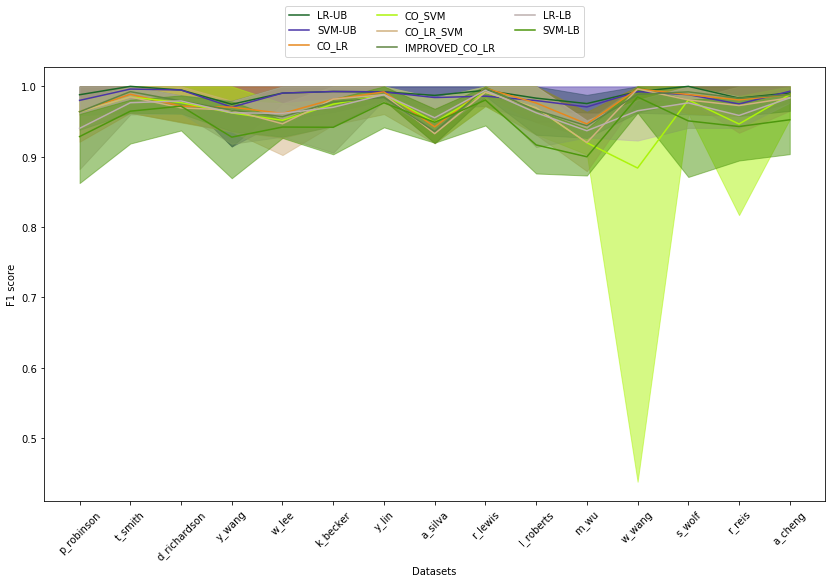

In [9]:
from matplotlib import pyplot as plt
import numpy as np

y_scale_p1 = [0,1]
x = name_list
random_color = np.random.rand(len(method_list),3)

plt.figure(figsize=(14,8))

for idx, method in enumerate(method_list):
    y = f1_mean[method]
    y_min = f1_min[method]
    y_max = f1_max[method]
    
    plt.plot(x, y, 'k', color = random_color[idx], label=method)
    plt.fill_between(x, y_min, y_max, alpha=0.5, edgecolor = random_color[idx], facecolor=random_color[idx])
    plt.xticks(rotation=45, horizontalalignment='center')
    
    y_scale_p1 = plt.gca().get_ylim()

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.xlabel('Datasets')
plt.ylabel('F1 score')
#plt.savefig(fig_save_path+"all_method_result_variance.png", dpi=150)
plt.show()

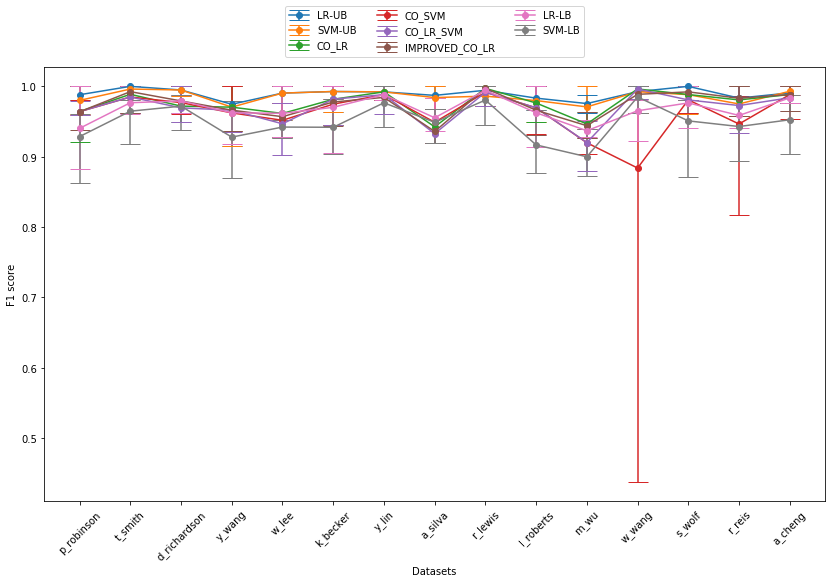

In [12]:
y_scale_p2 = [0,1]
x = name_list

fig, ax = plt.subplots(figsize=(14,8))

for idx, method in enumerate(method_list):
    y = f1_mean[method]
    y_min_error = [a - b for a, b in zip(f1_mean[method], f1_min[method])]
    y_max_error = [a - b for a, b in zip(f1_max[method], f1_mean[method])]
    y_error = [y_min_error,y_max_error]

    (_, caps, _) = ax.errorbar(x, y,yerr=y_error, fmt='-o',capsize=10, label=method)
    for cap in caps:
        cap.set_markeredgewidth(1)
    plt.xticks(rotation=45, horizontalalignment='center')
    y_scale_p2 = plt.gca().get_ylim()

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.xlabel('Datasets')
plt.ylabel('F1 score')
#plt.savefig(fig_save_path+"all_method_result_variance.png", dpi=150)
plt.show()

# Phase 3: Plot 2. Plot per fold variance for each method

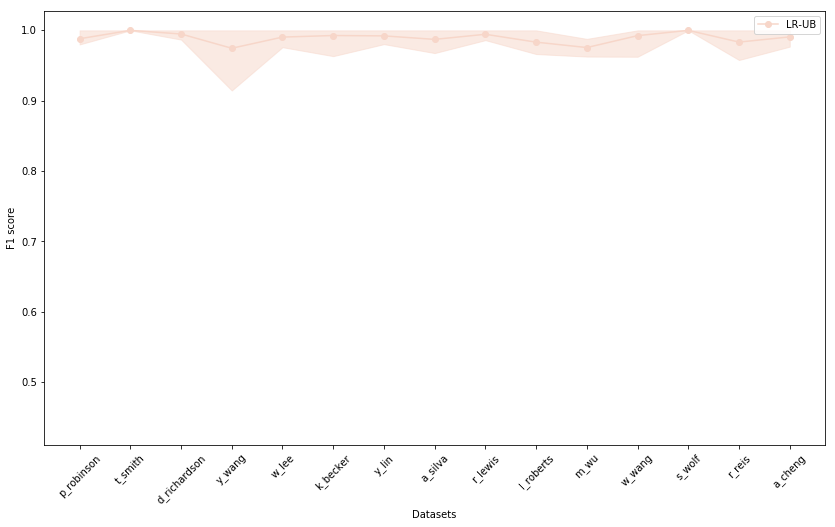

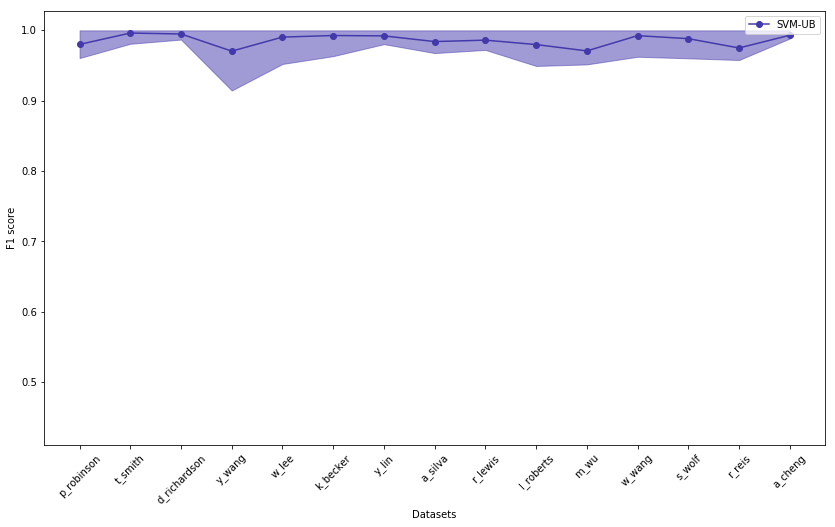

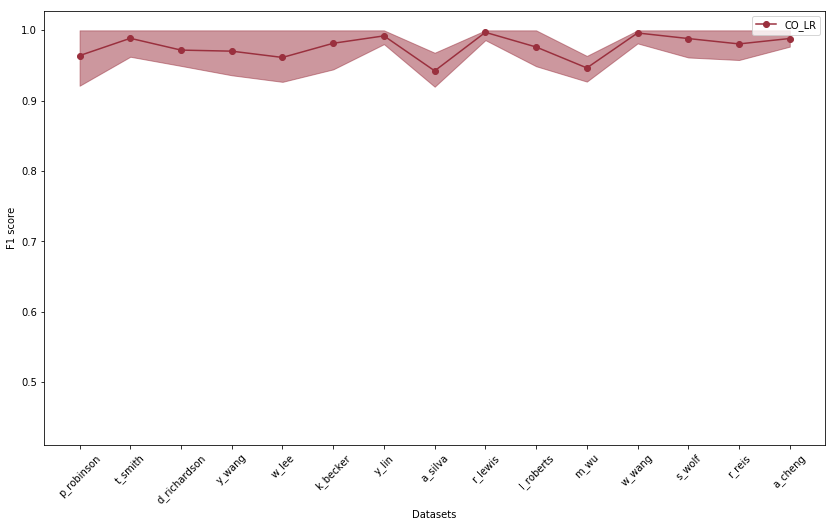

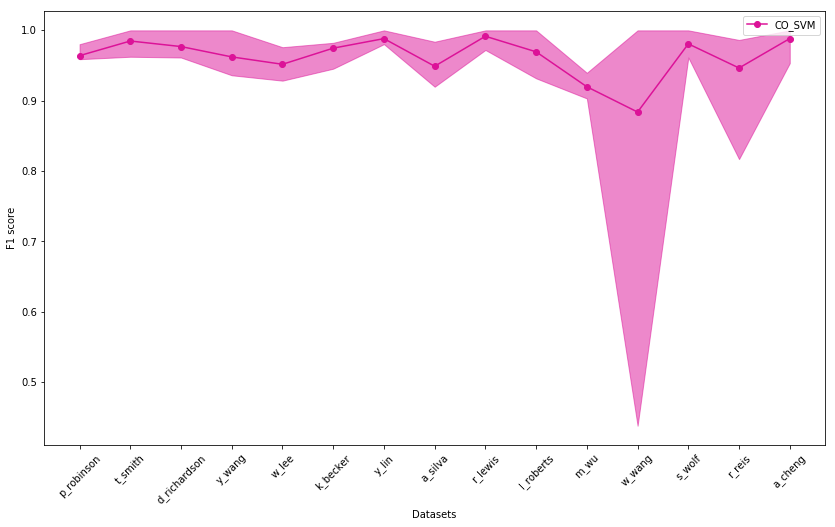

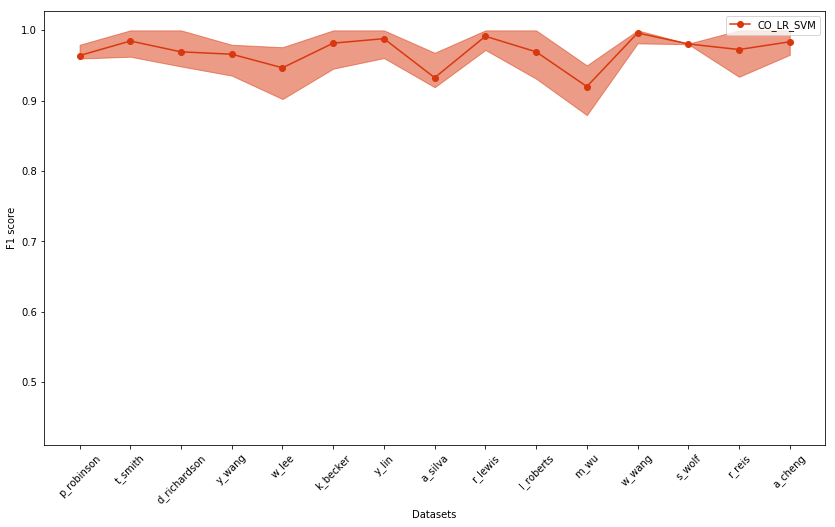

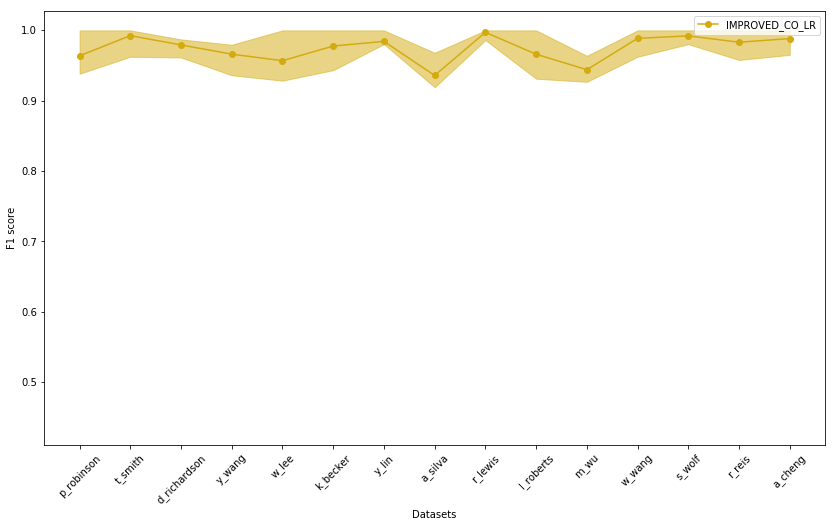

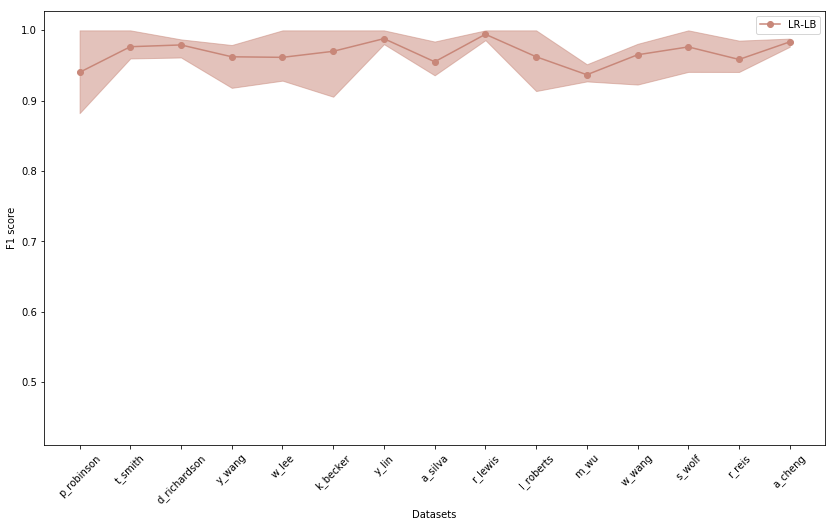

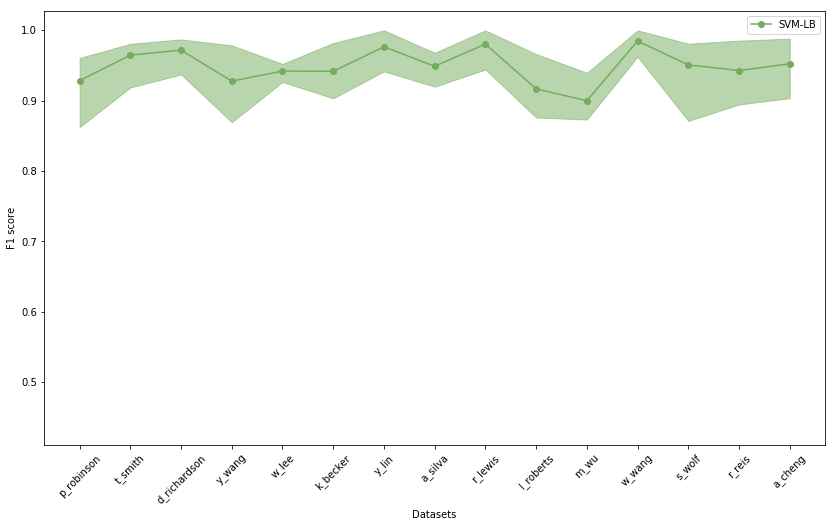

(0.41, 1.0280952380952382)


In [23]:
for idx, method in enumerate(method_list):
    plt.figure(figsize=(14,8))
    x = name_list
    y = f1_mean[method]
    y_min = f1_min[method]
    y_max = f1_max[method]
    
    plt.plot(x, y, 'k', color = random_color[idx],marker='o', label=method)
    plt.ylim(y_scale_p1)
    plt.fill_between(x, y_min, y_max, alpha=0.5, edgecolor = random_color[idx], facecolor=random_color[idx])
    plt.xticks(rotation=45, horizontalalignment='center')
    legend = plt.legend()
    plt.xlabel('Datasets')
    plt.ylabel('F1 score')
    #plt.savefig(fig_save_path+method+"_result_variance.png", dpi=150)
    plt.show()
print(y_scale_p1)

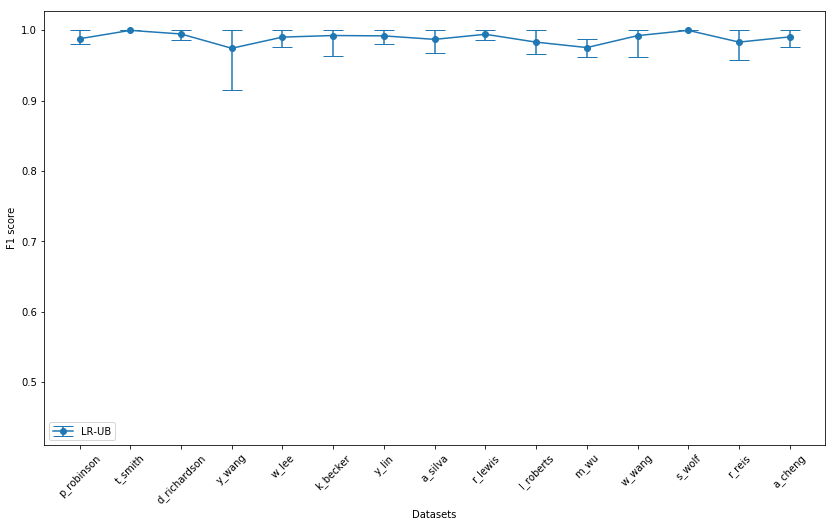

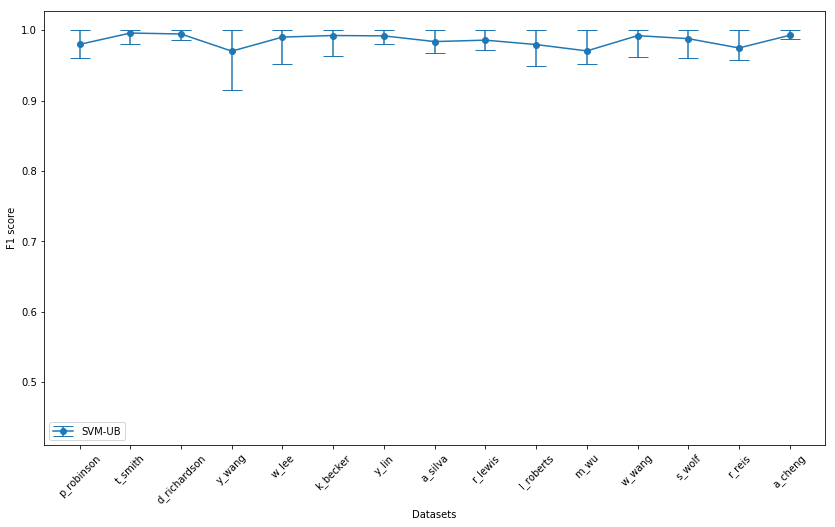

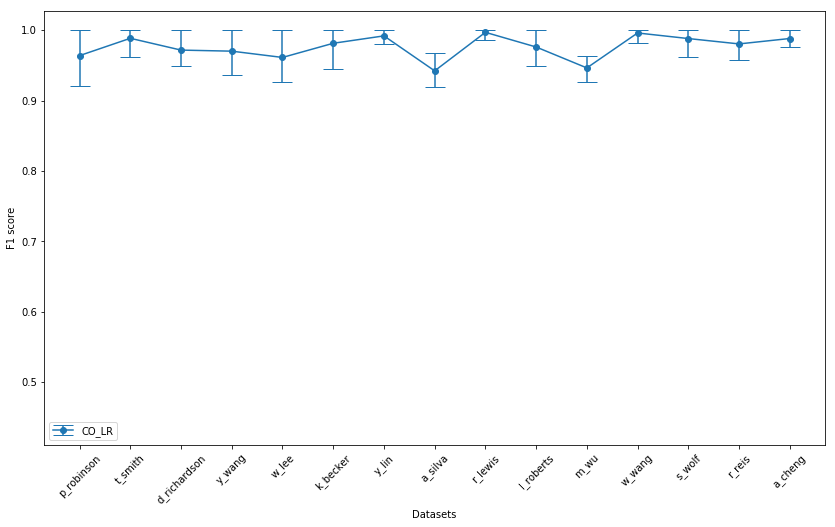

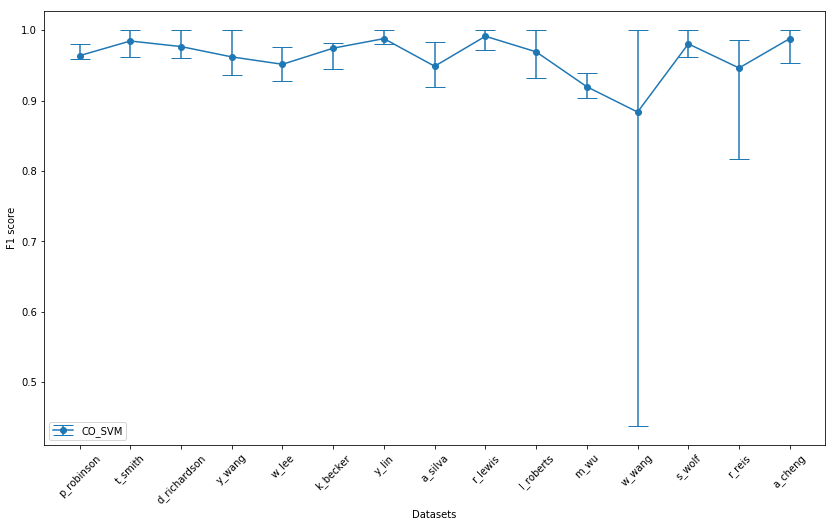

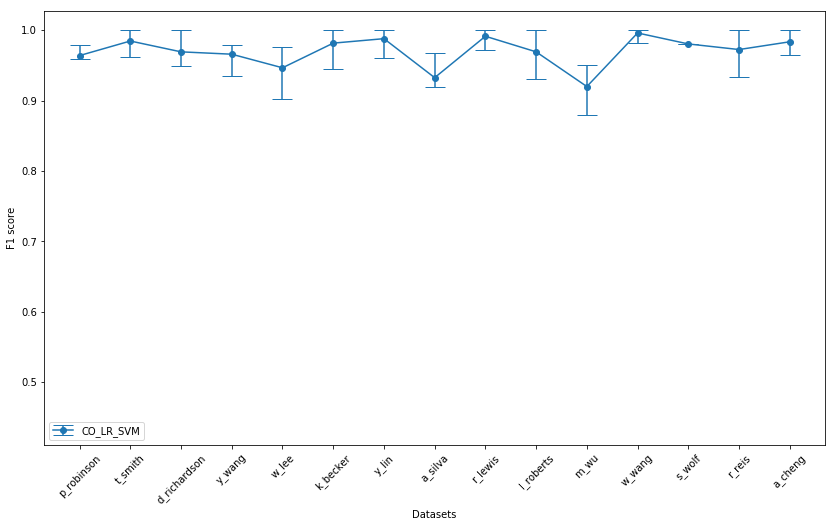

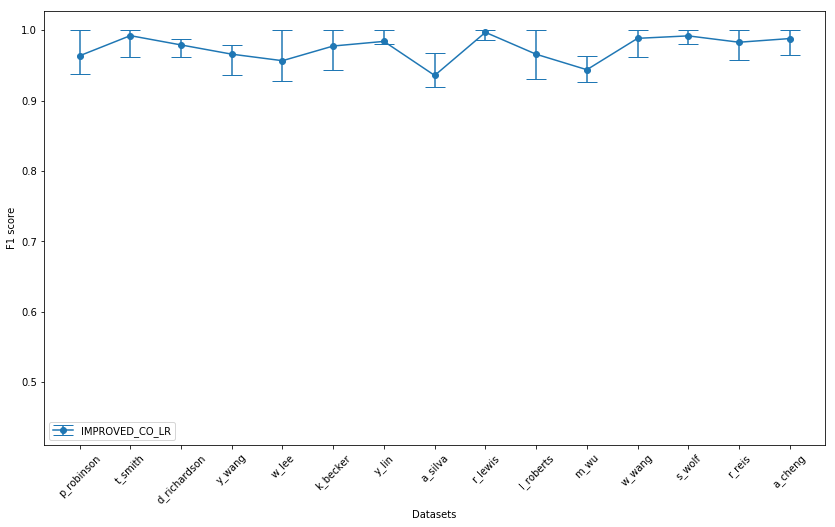

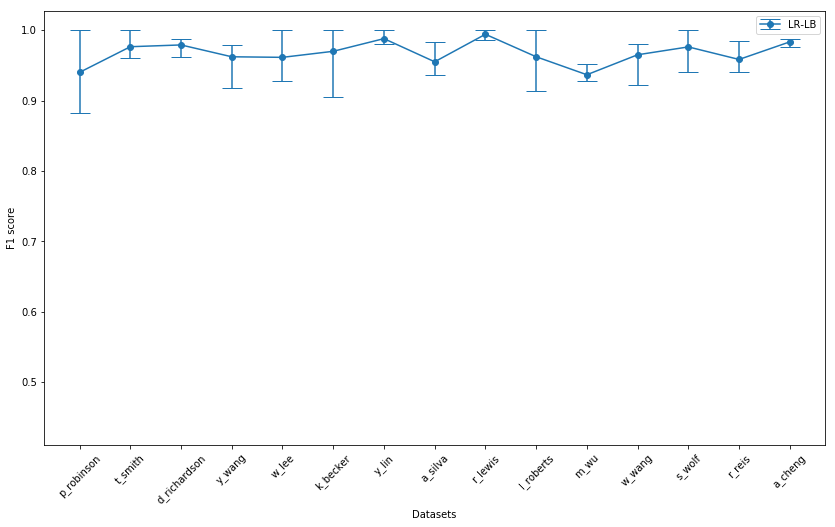

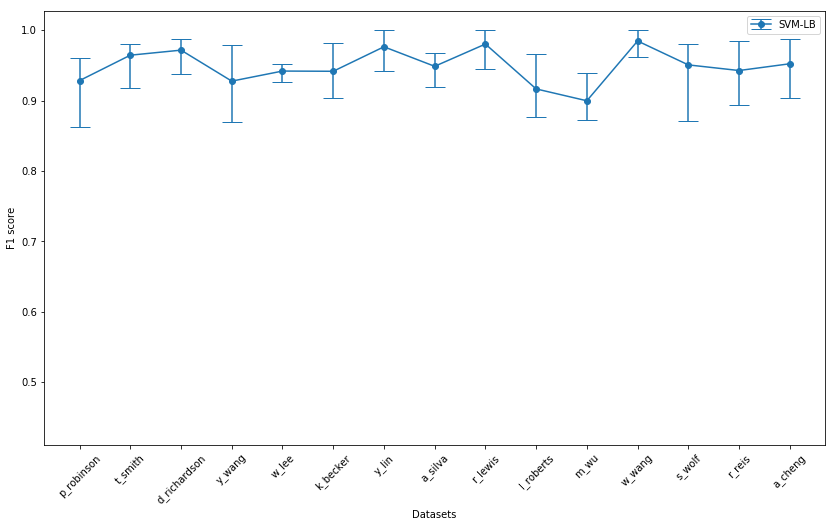

(0.41, 1.0280952380952382)


In [24]:
for idx, method in enumerate(method_list):
    fig, ax = plt.subplots(figsize=(14,8))
    x = name_list
    y = f1_mean[method]
    y_min_error = [a - b for a, b in zip(f1_mean[method], f1_min[method])]
    y_max_error = [a - b for a, b in zip(f1_max[method], f1_mean[method])]
    y_error = [y_min_error,y_max_error]

    (_, caps, _) = ax.errorbar(x, y,yerr=y_error, fmt='-o',capsize=10, label=method)
    plt.ylim(y_scale_p2)
    for cap in caps:
        cap.set_markeredgewidth(1)
    plt.xticks(rotation=45, horizontalalignment='center')
    legend = plt.legend()
    plt.xlabel('Datasets')
    plt.ylabel('F1 score')
    #plt.savefig(fig_save_path+method+"_result_variance.png", dpi=150)
    plt.show()
print(y_scale_p2)

# Phase 3: Plot 3. Plot per fold variance for LR/SVM based method

In [6]:
# combined lR methods together
print(name_list)
print(method_list)
print(f1_mean)
print(f1_min)
print(f1_max)

['p_robinson', 't_smith', 'd_richardson', 'y_wang', 'w_lee', 'k_becker', 'y_lin', 'a_silva', 'r_lewis', 'l_roberts', 'm_wu', 'w_wang', 's_wolf', 'r_reis', 'a_cheng']
['LR-UB', 'SVM-UB', 'CO_LR', 'CO_SVM', 'CO_LR_SVM', 'IMPROVED_CO_LR', 'LR-LB', 'SVM-LB']
defaultdict(<class 'list'>, {'LR-UB': [0.988106716574444, 1.0, 0.9948617254648109, 0.9745644197072767, 0.9904490694280824, 0.9926767676767676, 0.992165725047081, 0.9871959781214145, 0.9944390775864239, 0.9832653351982092, 0.9755707235273041, 0.9925, 1.0, 0.9833352751424297, 0.9907297324420613], 'SVM-UB': [0.9800731729216711, 0.9961904761904762, 0.9948617254648109, 0.9704793856936714, 0.9904545454545455, 0.9926767676767676, 0.992165725047081, 0.9840702149956513, 0.9861052083129443, 0.979823800151779, 0.9708046048692545, 0.9925, 0.9882113484349425, 0.9749997680844438, 0.9930332681017612], 'CO_LR': [0.9641248500339674, 0.9887329961632367, 0.9719596037110847, 0.970438479453677, 0.9615102648029478, 0.9816523209199624, 0.992165725047081, 0.9

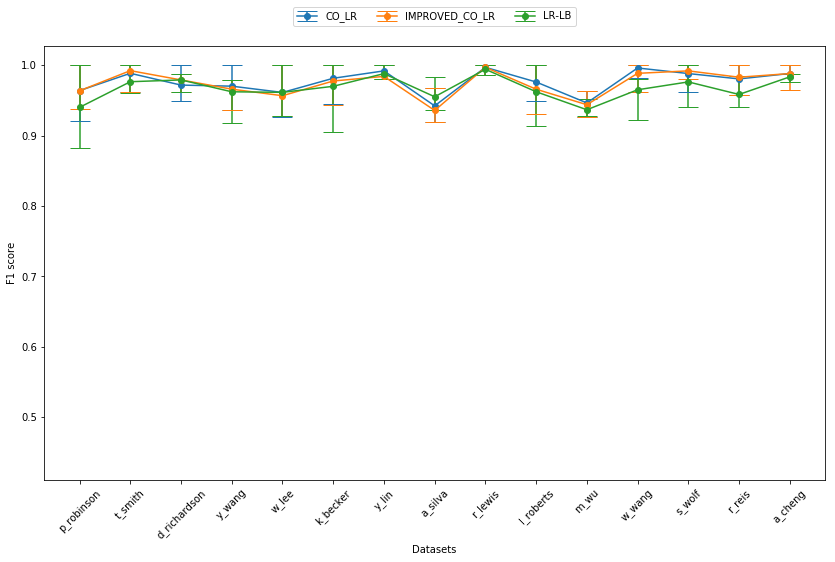

In [14]:
fig, ax = plt.subplots(figsize=(14,8))

for idx, method in enumerate(method_list):
    if method in ["CO_LR","IMPROVED_CO_LR","LR-LB"]:
        y = f1_mean[method]
        y_min_error = [a - b for a, b in zip(f1_mean[method], f1_min[method])]
        y_max_error = [a - b for a, b in zip(f1_max[method], f1_mean[method])]
        y_error = [y_min_error,y_max_error]

        (_, caps, _) = ax.errorbar(x, y,yerr=y_error, fmt='-o',capsize=10, label=method)
        plt.ylim(y_scale_p2)
        for cap in caps:
            cap.set_markeredgewidth(1)
        plt.xticks(rotation=45, horizontalalignment='center')
        y_scale_p2 = plt.gca().get_ylim()

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.xlabel('Datasets')
plt.ylabel('F1 score')
#plt.savefig(fig_save_path+"LR_result_variance.png", dpi=150)
plt.show()

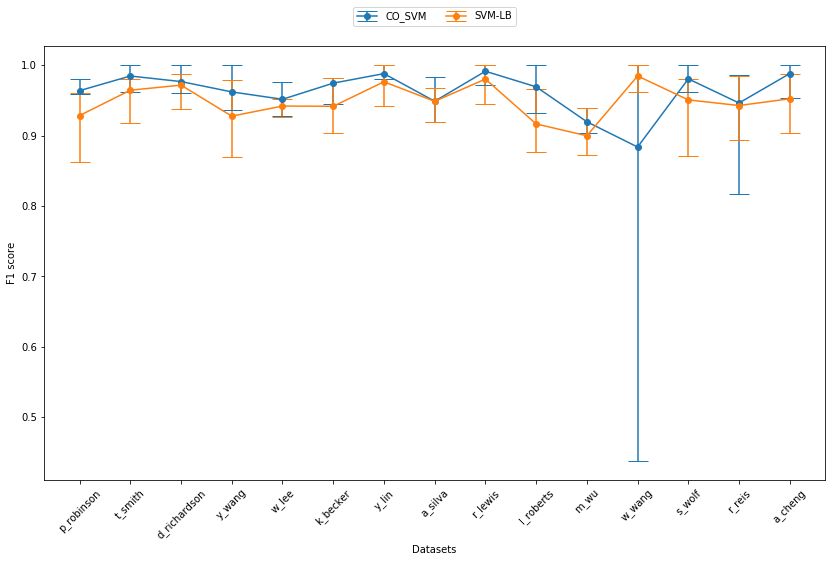

In [15]:
fig, ax = plt.subplots(figsize=(14,8))

for idx, method in enumerate(method_list):
    if method in ["SVM-LB","CO_SVM"]:
        y = f1_mean[method]
        y_min_error = [a - b for a, b in zip(f1_mean[method], f1_min[method])]
        y_max_error = [a - b for a, b in zip(f1_max[method], f1_mean[method])]
        y_error = [y_min_error,y_max_error]

        (_, caps, _) = ax.errorbar(x, y,yerr=y_error, fmt='-o',capsize=10, label=method)
        plt.ylim(y_scale_p2)
        for cap in caps:
            cap.set_markeredgewidth(1)
        plt.xticks(rotation=45, horizontalalignment='center')
        y_scale_p2 = plt.gca().get_ylim()

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.xlabel('Datasets')
plt.ylabel('F1 score')
#plt.savefig(fig_save_path+"SVM_result_variance.png", dpi=150)
plt.show()